### DATA WRANGLING OF GAMBIAN INTERGRATED HOUSEHOLD SURVEY - 2015

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
from matplotlib import pyplot as plt

In [2]:
# Loading data of the Gambia Integrated Household Survey (2015)
# Data was collected bu the Gambia Bureaur of Statistics
raw_data = pd.read_csv(r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\part a section 1-6 individual-level.csv')
key_lga = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='lga')
key_district1 = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='district1')
key_nationality = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='nationality')
key_ethnicity = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='ethnicity')
key_marital_status = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='marital_status')
key_type_of_union = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='type_of_union')
key_edu1 = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='father_edu')
key_edu2 = pd.read_excel (r'C:\Users\yfabureh\Documents\Python - Online\Data Wrangling Project\Keys.xlsx', sheet_name='mother_edu')

In [3]:
raw_data

,quarter,lga,district,district1,settlement,area,eanum,select_hhold,hid,sect_01,...,s6q4g,s6q4h,s6q4i,s6q4j,s6q4k,s6q5,s6q6,s6q7,s6q8,s6q9
0,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0
1,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105792,3,8,86,86,86231,2,86222,19,8622219,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105793,3,8,86,86,86231,2,86222,20,8622220,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0
105794,3,8,86,86,86231,2,86222,20,8622220,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105795,3,8,86,86,86231,2,86222,20,8622220,Part 1 SECTION 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# To view all columns in my DataFrane
pd.set_option('display.max_columns', None)

In [5]:
raw_data.head(10)

,quarter,lga,district,district1,settlement,area,eanum,select_hhold,hid,sect_01,idnum,s1q3a,s1q3b,bday,s1q4a,s1q4b,agemonth,s1q5,s1q6,s1q7,s1q8,s1q9,s1q10,s1q11,s1q12,s1q13,s1q14,s1q15,s1q16,s1q17,s1q18,s1q19,s1q20,s1q21,s1q22,s1q23,sect_02,s2aq2,s2aq3_1,s2aq3_2,s2aq4_1,s2aq4_2,s2aq5_1,s2aq5_2,s2aq6_1,s2aq6_2,s2aq7,s2aq8,s2aq9,s2aq10,s2aq11,s2aq12,s2aq13,s2aq14,s2aq15,s2aq16,s2aq17,s2aq18a,s2aq18b,s2aq18c,s2aq19,s2aq20a,s2aq20b,s2aq20c,s2aq20d,s2aq20e,s2aq20f,s2aq20g,s2aq20h,s2aq20i,s2aq20j,s2aq20k,s2aq20l,s2aq21,s2aq22,s2aq23,s2aq24_1,s2aq24_2,s2aq25,s2aq26,s2aq27_1,s2aq27_2,s2bq2,s2bq3,s2bq4a,s2bq4b,s2bq4c,s2bq4d,s2bq4e,s2bq5a,s2bq5b,s2bq5c,s2bq5e,s2bq5d,s2bq5f,s2bq5g,s2bq5h,s2bq6,s2bq7a,s2bq7b,s2bq7c,s2bq7d,s2bq7e,s2bq7f,s2bq7g,s2bq8,s2bq9a,s2bq9b,s2bq9c,s2bq9d,s2bq9e,s2bq9f,s2bq9g,s2bq9h,s2bq9i,s2bq9j,s2bq9k,ages,s2cq2,s2cq3,s2cq4a,s2cq4b,s2cq4c,s2dq2,s2dq3,s2dq4a,s2dq4b,s2dq5,s2dq6,s2eq2,s2eq3,s2eq4,s2eq4a,s2eq4b,s2eq4c,s2eq5,s2eq6,s2eq7,s2eq8,s2eq9,s2eq10,s2eq11,s2eq12,s2eq13,s2eq14,s2eq15,s2eq16,s2eq17,s2eq18,s2eq19,s2eq20,s2eq21,s2eq22,s2eq23,s2eq24,s2eq25,s2fq2,s2fq3,s2fq4,s2fq5a,s2fq5b,s2fq6a,s2fq6b,s2fq7a,s2fq7b,s2fq8a,s2fq8b,s2fq9,s2fq10,s2fq11,s2fq12a,s2fq12b,s2fq13a,s2fq13b,s2fq14,s2fq15,s2fq16,s2fq17,s2fq18,sect_03,s3aq2,s3aq3,s3aq4,s3aq5,s3aq6,s3aq7,s3aq8,s3aq9,s3aq10,s3aq11,s3aq12,s3aq13,s3aq14,s3aq15,s3aq16,s3aq17,s3aq18,s3aq19,s3aq20,s3aq21,s3bq2,s3bq3,s3bq4,s3bq5,s3bq6,s3bq7,s3bq8,s3bq9,s3bq10,s3bq11,s3bq12,s3bq13,s3bq14,s3bq15,s3bq16,s3bq17,s3cq2,s3cq3,s3cq4,s3cq5,s3cq6,s3cq7,s3cq8,s3cq9,s3cq10,s3cq11_years,s3cq11_months,s3dq2,s3dq3,s3dq4,s3dq5,s3dq6,s3dq7,s3dq8,s3dq9,s3dq10,s3dq11a,s3dq11b,s3dq11c,sect_04,s4aq2,s4aq1a,s4aq3,s4aq4,s4aq5,s4aq6,s4aq7,s4aq8,s4aq9,s4aq10,s4aq11,s4bq2,s4bq3,s4bq4,s4bq5,s4bq6,s4bq7,s4bq8,s4bq9,s4dq2,s4dq3,s4dq4,s4dq5,s4dq6,s4dq7,s4dq8a,s4dq8b,s4dq9,s4dq10,s4dq11,s4dq12,s4dq13,s4dq14a,s4dq14b,s4dq15,s4dq16,s4dq17,s4dq18,s4dq19,s4dq20,s4dq21,s4dq22,s4eq2,s4eq3,s4eq4,s4eq5,s4eq6,s4eq7,s4eq8a,s4eq8b,s4eq9,s4eq10,s4eq11,s4eq12,s4eq13,s4eq14,s4fq2,s4fq3,s4fq4,s4fq5,s4fq6,s4fq7,s4fq8,s4fq9,s4fq10a,s4fq10b,s4fq11,s4fq12,s4fq13,s4fq14,s4fq15,s4fq16,s4fq17,s4fq18,s4fq19,sect_05,s5q2,s5q3_1_cob,s5q3_2_pob,s5q3_3_area,s5q4,s5q5,s5q6a,s5q6b,s5q7a,s5q7b,s5q8,s5q9,s5q10,sect_06,s6q2,s6q3,s6q4a,s6q4b,s6q4c,s6q4d,s6q4e,s6q4f,s6q4g,s6q4h,s6q4i,s6q4j,s6q4k,s6q5,s6q6,s6q7,s6q8,s6q9
0,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,1,NaN,1975.0,NaN,40.0,NaN,NaN,1,1.0,1.0,9.0,1.0,2.0,1.0,2.0,NaN,NaN,98.0,NaN,8620.0,1.0,2.0,NaN,10.0,NaN,9820.0,PART 1 Section 2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,X,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,9.0,40.0,X,2.0,NaN,NaN,NaN,X,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PART 1 Section 3,1.0,1.0,NaN,NaN,6.0,3.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,1.0,1.0,1.0,1.0,1.0,X,2.0,NaN,NaN,NaN,X,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PART 1 Section 4,X,1.0,1.0,NaN,2.0,2.0,2.0,2.0,1.0,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PART 1 Section 5,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PART 1 Section 6,X,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0
1,1,1,10,10,10101,1,10101,1,1010101,Part 1 SECTION 1,2,NaN,1979.0,NaN,36.0,NaN,NaN,2,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,98.0,NaN,4321.0,1.0,2.0,NaN,6.0,2.0,9820.0,PART 1 Section 2,1.0,99.0,Na

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105797 entries, 0 to 105796
Columns: 348 entries, quarter to s6q9
dtypes: float64(312), int64(11), object(25)
memory usage: 280.9+ MB


In [7]:
# identifying column index number for the purpose of truncating section one of the data (first 35 columnns)
raw_data.columns.get_loc('sect_02')

36

In [8]:
raw_data.rename({'s4dq8a':'net_salary','s4dq10':'bonus_received',
                    's4dq13':'in_kind_payments'}, axis = 1, inplace = True)

In [9]:
# Extract Income Information from raw_data
income_data = raw_data[['net_salary','bonus_received','in_kind_payments']]

In [10]:
income_data

,net_salary,bonus_received,in_kind_payments
0,NaN,NaN,NaN
1,-99.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
105792,NaN,NaN,NaN
105793,NaN,NaN,NaN
105794,NaN,NaN,NaN
105795,NaN,NaN,NaN


In [11]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105797 entries, 0 to 105796
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   net_salary        3641 non-null   float64
 1   bonus_received    212 non-null    float64
 2   in_kind_payments  550 non-null    float64
dtypes: float64(3)
memory usage: 2.4 MB


In [12]:
# Create a subset of the data (Kept Section 1 Part 1 data)
# Drop Column number 36 to 348
raw_data.drop(raw_data.iloc[:, 36:], axis = 1, inplace = True)

In [13]:
# Reviewed columns in Part1 Section 1 data and dropped individual columns I do not need for my analysis
df = raw_data.drop(['sect_01','district','settlement','agemonth',
                    'eanum','select_hhold','s1q4a','s1q17','s1q23',
                    's1q14','s1q6','s1q16','s1q20','s1q22'], axis = 1)

In [14]:
df

,quarter,lga,district1,area,hid,idnum,s1q3a,s1q3b,bday,s1q4b,s1q5,s1q7,s1q8,s1q9,s1q10,s1q11,s1q12,s1q13,s1q15,s1q18,s1q19,s1q21
0,1,1,10,1,1010101,1,NaN,1975.0,NaN,NaN,1,1.0,9.0,1.0,2.0,1.0,2.0,NaN,98.0,1.0,2.0,10.0
1,1,1,10,1,1010101,2,NaN,1979.0,NaN,NaN,2,1.0,6.0,1.0,2.0,1.0,1.0,2.0,98.0,1.0,2.0,6.0
2,1,1,10,1,1010101,3,NaN,2006.0,NaN,NaN,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
3,1,1,10,1,1010101,4,NaN,2010.0,NaN,NaN,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
4,1,1,10,1,1010101,5,4.0,2014.0,4/17/2014,0.0,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105792,3,8,86,2,8622219,5,12.0,2014.0,12/8/2014,1.0,1,1.0,2.0,1.0,NaN,NaN,1.0,1.0,10.0,1.0,1.0,10.0
105793,3,8,86,2,8622220,1,NaN,1992.0,NaN,NaN,2,2.0,NaN,1.0,2.0,1.0,1.0,2.0,10.0,1.0,2.0,10.0
105794,3,8,86,2,8622220,2,1.0,2011.0,1/22/2011,11.0,1,1.0,2.0,1.0,NaN,NaN,1.0,2.0,10.0,1.0,1.0,10.0
105795,3,8,86,2,8622220,3,12.0,2013.0,12/26/2013,0.0,1,1.0,2.0,1.0,NaN,NaN,1.0,2.0,10.0,1.0,1.0,10.0


In [15]:
# Renaming column names
df.rename({'s1q3a': 'birth_month', 
           's1q4b': 'age_in_years',
           's1q3b': 'birth_year',
          's1q5': 'sex',
          's1q9': 'religion',
          's1q12': 'father_alive',
          's1q13': 'father_live_in_household',
          's1q18': 'mother_alive',
          's1q19': 'mother_live_in_household'},axis = 1, inplace=True)

In [16]:
df

,quarter,lga,district1,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,s1q7,s1q8,religion,s1q10,s1q11,father_alive,father_live_in_household,s1q15,mother_alive,mother_live_in_household,s1q21
0,1,1,10,1,1010101,1,NaN,1975.0,NaN,NaN,1,1.0,9.0,1.0,2.0,1.0,2.0,NaN,98.0,1.0,2.0,10.0
1,1,1,10,1,1010101,2,NaN,1979.0,NaN,NaN,2,1.0,6.0,1.0,2.0,1.0,1.0,2.0,98.0,1.0,2.0,6.0
2,1,1,10,1,1010101,3,NaN,2006.0,NaN,NaN,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
3,1,1,10,1,1010101,4,NaN,2010.0,NaN,NaN,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
4,1,1,10,1,1010101,5,4.0,2014.0,4/17/2014,0.0,1,1.0,9.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105792,3,8,86,2,8622219,5,12.0,2014.0,12/8/2014,1.0,1,1.0,2.0,1.0,NaN,NaN,1.0,1.0,10.0,1.0,1.0,10.0
105793,3,8,86,2,8622220,1,NaN,1992.0,NaN,NaN,2,2.0,NaN,1.0,2.0,1.0,1.0,2.0,10.0,1.0,2.0,10.0
105794,3,8,86,2,8622220,2,1.0,2011.0,1/22/2011,11.0,1,1.0,2.0,1.0,NaN,NaN,1.0,2.0,10.0,1.0,1.0,10.0
105795,3,8,86,2,8622220,3,12.0,2013.0,12/26/2013,0.0,1,1.0,2.0,1.0,NaN,NaN,1.0,2.0,10.0,1.0,1.0,10.0


In [17]:
# Encoding numerical categoricals into meaningful string values using the data key
cleanup_categoricals = {'sex':{1:'male', 2:'female'},
                       'religion':{1:'islam',2:'christianity',3:'traditional',4:'other'},
                       'father_alive':{1:'yes',2:'no'},
                       'father_live_in_household':{1:'yes',2:'no'},
                       'mother_alive':{1:'yes',2:'no'},
                       'mother_live_in_household':{1:'yes',2:'no'},
                       'area':{1:'urban',2:'rural'}}

In [18]:
df = df.replace(cleanup_categoricals)

In [19]:
df.head(15)

,quarter,lga,district1,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,s1q7,s1q8,religion,s1q10,s1q11,father_alive,father_live_in_household,s1q15,mother_alive,mother_live_in_household,s1q21
0,1,1,10,urban,1010101,1,NaN,1975.0,NaN,NaN,male,1.0,9.0,islam,2.0,1.0,no,NaN,98.0,yes,no,10.0
1,1,1,10,urban,1010101,2,NaN,1979.0,NaN,NaN,female,1.0,6.0,islam,2.0,1.0,yes,no,98.0,yes,no,6.0
2,1,1,10,urban,1010101,3,NaN,2006.0,NaN,NaN,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
3,1,1,10,urban,1010101,4,NaN,2010.0,NaN,NaN,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
4,1,1,10,urban,1010101,5,4.0,2014.0,4/17/2014,0.0,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
5,1,1,10,urban,1010101,6,NaN,1990.0,NaN,NaN,female,1.0,6.0,islam,1.0,NaN,yes,no,98.0,yes,no,10.0
6,1,1,10,urban,1010103,1,NaN,1960.0,NaN,NaN,male,1.0,5.0,islam,2.0,1.0,no,NaN,10.0,no,NaN,10.0
7,1,1,10,urban,1010103,2,NaN,1963.0,NaN,NaN,female,1.0,4.0,islam,2.0,1.0,no,NaN,10.0,yes,no,10.0
8,1,1,10,urban,1010103,3,NaN,1991.0,NaN,NaN,male,1.0,5.0,islam,1.0,NaN,yes,yes,10.0,yes,yes,10.0
9,1,1,10,urban,1010103,4,NaN,1995.0,NaN,NaN,female,1.0,5.0,islam,2.0,1.0,yes,yes,10.0,yes,yes,10.0


In [20]:
# converting 'bday' column to datetime form
df['bday']= pd.to_datetime(df['bday'],format = '%m/%d/%Y')

In [21]:
# Converting 'birth_month' dtype to int and then converting it to name of month
df['birth_month'] = df['birth_month'].fillna(0).astype('int64')
df['birth_month'] = df['birth_month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
df['birth_year'].dtype

dtype('float64')

In [23]:
# Converting float birth_year into datetime format
df['birth_year'] = df['birth_year'].fillna(0).astype('int')
df['birth_year'] = pd.to_datetime(df['birth_year'], format='%Y', errors = 'ignore')

In [24]:
df.head(10)

,quarter,lga,district1,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,s1q7,s1q8,religion,s1q10,s1q11,father_alive,father_live_in_household,s1q15,mother_alive,mother_live_in_household,s1q21
0,1,1,10,urban,1010101,1,,1975,NaT,NaN,male,1.0,9.0,islam,2.0,1.0,no,NaN,98.0,yes,no,10.0
1,1,1,10,urban,1010101,2,,1979,NaT,NaN,female,1.0,6.0,islam,2.0,1.0,yes,no,98.0,yes,no,6.0
2,1,1,10,urban,1010101,3,,2006,NaT,NaN,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
3,1,1,10,urban,1010101,4,,2010,NaT,NaN,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
4,1,1,10,urban,1010101,5,Apr,2014,2014-04-17,0.0,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
5,1,1,10,urban,1010101,6,,1990,NaT,NaN,female,1.0,6.0,islam,1.0,NaN,yes,no,98.0,yes,no,10.0
6,1,1,10,urban,1010103,1,,1960,NaT,NaN,male,1.0,5.0,islam,2.0,1.0,no,NaN,10.0,no,NaN,10.0
7,1,1,10,urban,1010103,2,,1963,NaT,NaN,female,1.0,4.0,islam,2.0,1.0,no,NaN,10.0,yes,no,10.0
8,1,1,10,urban,1010103,3,,1991,NaT,NaN,male,1.0,5.0,islam,1.0,NaN,yes,yes,10.0,yes,yes,10.0
9,1,1,10,urban,1010103,4,,1995,NaT,NaN,female,1.0,5.0,islam,2.0,1.0,yes,yes,10.0,yes,yes,10.0


In [25]:
# Recalculating age_in_years based on birth_year and year of survery == 2015
df['age_in_years'] = 2015 - df['birth_year']

In [26]:
df.head(10)

,quarter,lga,district1,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,s1q7,s1q8,religion,s1q10,s1q11,father_alive,father_live_in_household,s1q15,mother_alive,mother_live_in_household,s1q21
0,1,1,10,urban,1010101,1,,1975,NaT,40,male,1.0,9.0,islam,2.0,1.0,no,NaN,98.0,yes,no,10.0
1,1,1,10,urban,1010101,2,,1979,NaT,36,female,1.0,6.0,islam,2.0,1.0,yes,no,98.0,yes,no,6.0
2,1,1,10,urban,1010101,3,,2006,NaT,9,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
3,1,1,10,urban,1010101,4,,2010,NaT,5,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
4,1,1,10,urban,1010101,5,Apr,2014,2014-04-17,1,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0
5,1,1,10,urban,1010101,6,,1990,NaT,25,female,1.0,6.0,islam,1.0,NaN,yes,no,98.0,yes,no,10.0
6,1,1,10,urban,1010103,1,,1960,NaT,55,male,1.0,5.0,islam,2.0,1.0,no,NaN,10.0,no,NaN,10.0
7,1,1,10,urban,1010103,2,,1963,NaT,52,female,1.0,4.0,islam,2.0,1.0,no,NaN,10.0,yes,no,10.0
8,1,1,10,urban,1010103,3,,1991,NaT,24,male,1.0,5.0,islam,1.0,NaN,yes,yes,10.0,yes,yes,10.0
9,1,1,10,urban,1010103,4,,1995,NaT,20,female,1.0,5.0,islam,2.0,1.0,yes,yes,10.0,yes,yes,10.0


In [27]:
# Joining the df and income dataframes
df1 = df.join(income_data, how='outer')

In [28]:
df1.head(10)

,quarter,lga,district1,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,s1q7,s1q8,religion,s1q10,s1q11,father_alive,father_live_in_household,s1q15,mother_alive,mother_live_in_household,s1q21,net_salary,bonus_received,in_kind_payments
0,1,1,10,urban,1010101,1,,1975,NaT,40,male,1.0,9.0,islam,2.0,1.0,no,NaN,98.0,yes,no,10.0,NaN,NaN,NaN
1,1,1,10,urban,1010101,2,,1979,NaT,36,female,1.0,6.0,islam,2.0,1.0,yes,no,98.0,yes,no,6.0,-99.0,NaN,NaN
2,1,1,10,urban,1010101,3,,2006,NaT,9,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0,NaN,NaN,NaN
3,1,1,10,urban,1010101,4,,2010,NaT,5,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0,NaN,NaN,NaN
4,1,1,10,urban,1010101,5,Apr,2014,2014-04-17,1,male,1.0,9.0,islam,NaN,NaN,yes,yes,6.0,yes,yes,8.0,NaN,NaN,NaN
5,1,1,10,urban,1010101,6,,1990,NaT,25,female,1.0,6.0,islam,1.0,NaN,yes,no,98.0,yes,no,10.0,NaN,NaN,NaN
6,1,1,10,urban,1010103,1,,1960,NaT,55,male,1.0,5.0,islam,2.0,1.0,no,NaN,10.0,no,NaN,10.0,NaN,NaN,NaN
7,1,1,10,urban,1010103,2,,1963,NaT,52,female,1.0,4.0,islam,2.0,1.0,no,NaN,10.0,yes,no,10.0,NaN,NaN,NaN
8,1,1,10,urban,1010103,3,,1991,NaT,24,male,1.0,5.0,islam,1.0,NaN,yes,yes,10.0,yes,yes,10.0,NaN,NaN,NaN
9,1,1,10,urban,1010103,4,,1995,NaT,20,female,1.0,5.0,islam,2.0,1.0,yes,yes,10.0,yes,yes,10.0,NaN,NaN,NaN


In [29]:
## Changing the index keys from the default keys to the Value column in the tables
key_district1.set_index('district1', inplace = True)
key_edu1.set_index('s1q15', inplace = True)
key_edu2.set_index('s1q21', inplace = True)
key_ethnicity.set_index('s1q8', inplace = True)
key_lga.set_index('lga', inplace = True)
key_marital_status.set_index('s1q10', inplace = True)
key_nationality.set_index('s1q7', inplace = True)
key_type_of_union.set_index('s1q11', inplace = True)

In [30]:
df1 = pd.merge(df1,key_lga, how ='left',on = 'lga')
df1 = pd.merge(df1,key_marital_status, how ='left',on = 's1q10')
df1 = pd.merge(df1,key_nationality, how ='left',on = 's1q7')
df1 = pd.merge(df1,key_type_of_union, how ='left',on = 's1q11')
df1 = pd.merge(df1,key_district1, how ='left',on = 'district1')
df1 = pd.merge(df1,key_edu1, how ='left',on = 's1q15')
df1 = pd.merge(df1,key_edu2, how ='left',on = 's1q21')
df1 = pd.merge(df1,key_ethnicity, how ='left',on = 's1q8')

In [31]:
df1.drop(['district1','s1q15','s1q21',
          's1q8','lga','s1q10','s1q7','s1q11'], axis = 1, inplace = True)

In [32]:
# Converting non-answers(-99) to NaN
df1.replace(-99, np.nan, inplace = True)

In [33]:
# Calculating Net Inccome for each individual
df1['net_income'] = df1['net_salary'] + df1['bonus_received'] + df1['in_kind_payments']

In [34]:
df1.head(10)

,quarter,area,hid,idnum,birth_month,birth_year,bday,age_in_years,sex,religion,father_alive,father_live_in_household,mother_alive,mother_live_in_household,net_salary,bonus_received,in_kind_payments,local_gov,marital_status,nationality,type_of_union,district_name,father_highestLvlEduc,mother_highestLvlEduc,ethnicity,net_income
0,1,urban,1010101,1,,1975,NaT,40,male,islam,no,NaN,yes,no,NaN,NaN,NaN,Banjul,Married,Gambian,Monogamous,Banjul City Council,Don't know,Never attended,Bambara,NaN
1,1,urban,1010101,2,,1979,NaT,36,female,islam,yes,no,yes,no,NaN,NaN,NaN,Banjul,Married,Gambian,Monogamous,Banjul City Council,Don't know,Tertiary(diploma),Serrer,NaN
2,1,urban,1010101,3,,2006,NaT,9,male,islam,yes,yes,yes,yes,NaN,NaN,NaN,Banjul,NaN,Gambian,NaN,Banjul City Council,Tertiary(diploma),Masters,Bambara,NaN
3,1,urban,1010101,4,,2010,NaT,5,male,islam,yes,yes,yes,yes,NaN,NaN,NaN,Banjul,NaN,Gambian,NaN,Banjul City Council,Tertiary(diploma),Masters,Bambara,NaN
4,1,urban,1010101,5,Apr,2014,2014-04-17,1,male,islam,yes,yes,yes,yes,NaN,NaN,NaN,Banjul,NaN,Gambian,NaN,Banjul City Council,Tertiary(diploma),Masters,Bambara,NaN
5,1,urban,1010101,6,,1990,NaT,25,female,islam,yes,no,yes,no,NaN,NaN,NaN,Banjul,Never married,Gambian,NaN,Banjul City Council,Don't know,Never attended,Serrer,NaN
6,1,urban,1010103,1,,1960,NaT,55,male,islam,no,NaN,no,NaN,NaN,NaN,NaN,Banjul,Married,Gambian,Monogamous,Banjul City Council,Never attended,Never attended,Serahulleh,NaN
7,1,urban,1010103,2,,1963,NaT,52,female,islam,no,NaN,yes,no,NaN,NaN,NaN,Banjul,Married,Gambian,Monogamous,Banjul City Council,Never attended,Never attended,Jola/karoninka,NaN
8,1,urban,1010103,3,,1991,NaT,24,male,islam,yes,yes,yes,yes,NaN,NaN,NaN,Banjul,Never married,Gambian,NaN,Banjul City Council,Never attended,Never attended,Serahulleh,NaN
9,1,urban,1010103,4,,1995,NaT,20,female,islam,yes,yes,yes,yes,NaN,NaN,NaN,Banjul,Married,Gambian,Monogamous,Banjul City Council,Never attended,Never attended,Serahulleh,NaN


In [35]:
df1['nationality'].describe()

count      105796
unique         13
top       Gambian
freq       103000
Name: nationality, dtype: object

In [36]:
catergory_columns = df1[['religion','sex','birth_month','area','quarter','nationality','local_gov','marital_status','type_of_union','district_name',
     'father_highestLvlEduc','mother_highestLvlEduc','ethnicity']]

In [37]:
# Converting columns dtypes into categorical variables
for col in catergory_columns:
    df1[col] = df1[col].astype('category')

In [38]:
df1.dtypes

quarter                           category
area                              category
hid                                  int64
idnum                                int64
birth_month                       category
birth_year                           int64
bday                        datetime64[ns]
age_in_years                         int64
sex                               category
religion                          category
father_alive                        object
father_live_in_household            object
mother_alive                        object
mother_live_in_household            object
net_salary                         float64
bonus_received                     float64
in_kind_payments                   float64
local_gov                         category
marital_status                    category
nationality                       category
type_of_union                     category
district_name                     category
father_highestLvlEduc             category
mother_high

### Descriptive Statistics

In [39]:
df1['net_income'].describe()

count        85.000000
mean       9964.352941
std       15866.607142
min        1000.000000
25%        3800.000000
50%        6000.000000
75%        9500.000000
max      132000.000000
Name: net_income, dtype: float64

In [40]:
# Calculating the mean of the incomes grouped by sex
df1['net_income'].groupby(df['sex']).mean()

sex
female    11208.444444
male       9630.119403
Name: net_income, dtype: float64

> 
The information below suggests that there exist substantial incomplete information for a lot respondents of the survey

In [41]:
df1['net_income'].groupby(df1['father_highestLvlEduc']).sum()

father_highestLvlEduc
Bachelors                 0.0
Doctoral                  0.0
Don't know            25376.0
Lower sec              5450.0
Masters               75000.0
Never attended       679226.0
Non-tertiary              0.0
Primary (1-6)          3680.0
Teacher training          0.0
Tertiary(diploma)     24988.0
Upper sec             33250.0
Name: net_income, dtype: float64

> 
There exist a weak correlation (**0.32**) between income and age according to this correlation.
However this could be a sampling bias as the data collected indicates that we have only **85 respondents** who reported their incomes.

In [42]:
# Checking for correlation between age and income 
df1['net_income'].corr(df1['age_in_years'])

0.32034733182615716

### Basic Visualizations

<AxesSubplot:ylabel='Frequency'>

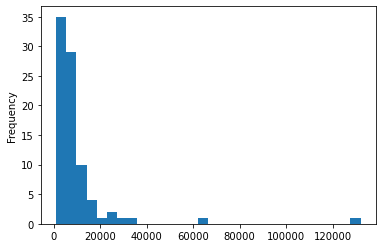

In [43]:
df1['net_income'].plot.hist(bins = 30)